<a href="https://colab.research.google.com/github/christianbusalanan/Prediction-using-Supervised-ML/blob/main/PredictingStudentScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation Data Science and Business Analytics Internship
Predicting Student Scores using Supervised Machine Learning

In [59]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive

In [60]:
#Converting CSV to DataFrame
df= pd.read_csv('/content/drive/MyDrive/data.csv')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


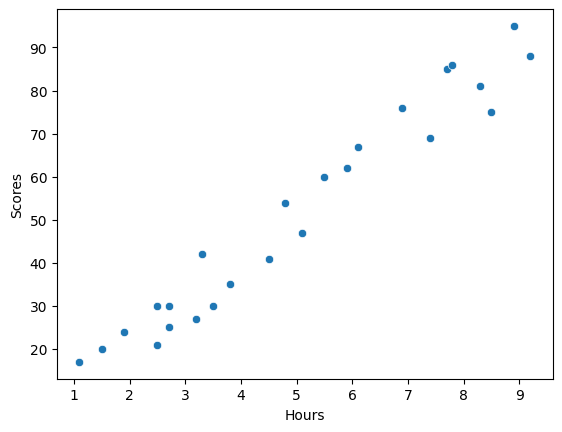

In [74]:
sns.scatterplot(data= df, x= 'Hours', y= 'Scores')
plt.show()

Above we can see that the predictor and the target has a linear relationship thus we can fit a linear regression line

In [61]:
#Making a train and test split
X= df.Hours.values.reshape(-1, 1)
y= df.Scores.values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42 )

In [62]:
#Fitting the model
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

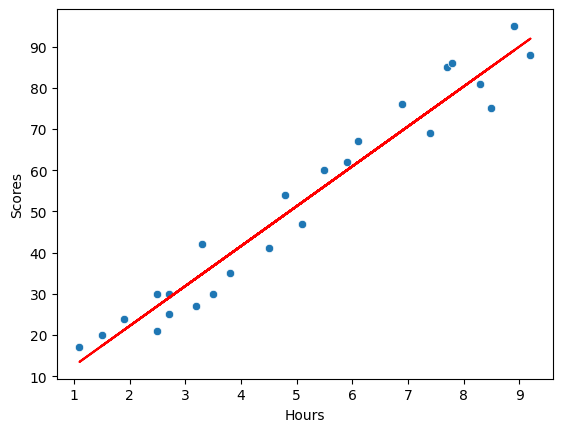

In [70]:
#Visualizing the linear regression model
line = model.coef_*df.Hours+model.intercept_
sns.scatterplot(data= df, x= df.Hours, y= df.Scores)
plt.plot(df.Hours, line, color= 'red')
plt.plot
plt.show()

Above we can see the fitted line

In [64]:
#Predicting the score if a student were to study for 9.25 hours
hours= 9.25
predict= model.predict([[hours]])
print('Hours:', hours)
print('Predicted Score:', predict[0])

Hours: 9.25
Predicted Score: 92.38611528261494


In [76]:
#Evaluating the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 3.9207511902099244
R-squared (R²): 0.9678055545167994




*   The MAE measures the average difference between the predicted scores and the actual scores. In this case, the MAE is approximately 3.92. This means that, on average, the model's predictions are off by about 3.92 points from the actual scores.
*   The R² measures the proportion of the variance in the dependent variable (scores) that is predictable from the independent variable (hours). In this case, the R² is approximately 0.968. This means that about 96.8% of the variation in scores can be explained by the hours variable. This is a very high value, indicating a strong linear relationship between hours and scores.


